In [92]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
plt.rcParams["figure.figsize"] = 12.8, 9.6

In [93]:
def generate_fixed_point_cloud():
    points = np.array([
        [0.274791784, -1.001679346, -1.851320839, 0.365840754],
        [-1.155674199, -1.215133985, 0.053119249, 1.162878076],
        [1.216239624, 0.764265677, 0.956099579, 1.198231236]])
    
    return points

In [94]:
def generate_point_cloud_for_plane():
    x = np.linspace(-3,3,10)
    y = np.linspace(-3,3,10)

    X,Y = np.meshgrid(x,y)
    # plane equation coefficient are a = 0.5, b = 0.3, c = 0.25, d = 2
    Z = (2 - 0.5*X - 0.3*Y)/0.25

    xs = X.flatten()
    ys = Y.flatten()
    zs = Z.flatten()
    points = np.array([xs, ys, zs])
    
    return points

In [95]:
def distance(X,p):
    plane = p[0:3]
    distance = (plane*X.T).sum(axis=1) - p[3]
    return distance / np.linalg.norm(plane)

def residuals(params, signal, X):
    return distance(X, params)

In [96]:
def get_initial_plane_coefficient():
    """ 
    plane equation is aX + bY + cZ = d
    plane_coeff = [a, b, c, d]
    """
    plane_coeff = [0.506645455682, -0.185724560275, -1.43998120646, 1.37626378129]
    
    return plane_coeff

In [97]:
# points = generate_fixed_point_cloud()
points = generate_point_cloud_for_plane()

In [98]:
plane_coeff = get_initial_plane_coefficient()

solution = leastsq(residuals, plane_coeff, args=(None, points))[0]

In [99]:
print("a = ", solution[0], "b = ", solution[1], "c = ", solution[2], "d = ", solution[3])

a =  -10.040013592870013 b =  -6.024008155722006 c =  -5.0200067964350055 d =  -40.160054371480044


In [100]:
print("old offset = ", (distance(points, plane_coeff)**2).sum())
print("new offset =  ", (distance(points, solution)**2).sum())

old offset =  9180.099441677468
new offset =   1.6487765408520984e-29


In [101]:
fig = plt.figure()

<Figure size 921.6x691.2 with 0 Axes>

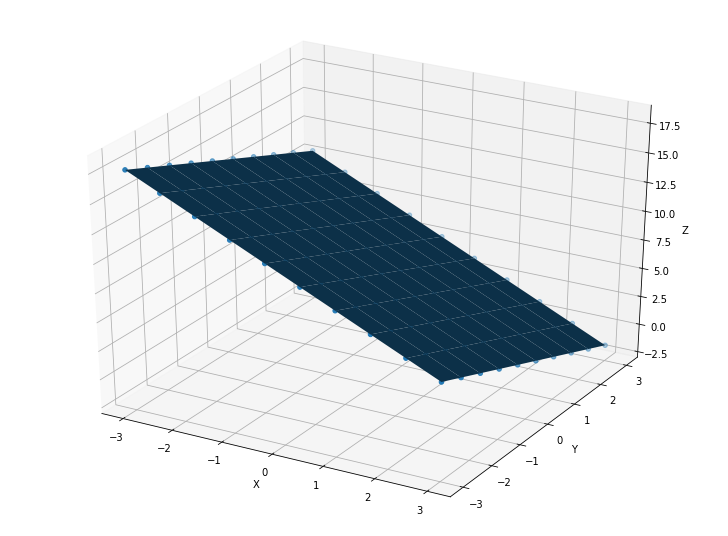

In [102]:
# plot point cloud and fitted plane
xs = points[0]
ys = points[1]
zs = points[2]
ax = plt.axes(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(xs, ys, zs, linewidth=1)

X,Y = np.meshgrid(x,y)
Z = (solution[3] - (solution[0]*X + solution[1]*Y))/solution[2]
ax.plot_surface(X, Y, Z)